In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
from fredapi import Fred # the api we will use for our Economic data

plt.style.use('fivethirtyeight') # will use this specific style for all out matplot lib plots.
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [8]:
Fred_key = "xxxxxxxxxxxxxxxx"

## creating the Fred object so we can actually pull the data


In [9]:
fred = Fred(api_key=Fred_key)# so we have made our fred obj
fred 

## Searching for Data and pulling data using the fred obj

In [11]:
sp_search = fred.search("S&P",order_by="popularity").head()
sp_search

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-04-21   2023-04-21   
CSUSHPINSA          CSUSHPINSA     2023-04-21   2023-04-21   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-04-21   2023-04-21   
SP500                    SP500     2023-04-21   2023-04-21   
MEHOINUSA672N    MEHOINUSA672N     2023-04-21   2023-04-21   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-04-20  Daily, Close   
CSUSHPINSA            1987-01-01      2023-01-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-04-20  Daily, Close   
SP500                 2013-04-22      2023-04-20  Daily, Close   
MEHOINUSA672N         1984-01-01      2021-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2021 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-04-21 08:42:03-05:00   
CSUSHPINSA                           NSA  2023-03-30 10:39:01-05:00   
BAMLH0A0HYM2EY                       NSA  2023-04-21 08:42:07-05:00   
SP500                                NSA  2023-04-20 19:10:53-05:00   
MEHOINUSA672N                        NSA  2022-09-13 13:48:01-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           95  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             91  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         84  This data represents the effective yield of th...  
SP500                  84  The observations for the S&P 500 represent the...  
MEHOINUSA672N          81  Household data are collected as of March.  As ...

#### So we found some datasets lets actually pull out some info now

In [13]:
sp500 = fred.get_series(series_id="SP500")

sp500

2013-04-22    1562.50
2013-04-23    1578.78
2013-04-24    1578.79
2013-04-25    1585.16
2013-04-26    1582.24
               ...   
2023-04-14    4137.64
2023-04-17    4151.32
2023-04-18    4154.87
2023-04-19    4154.52
2023-04-20    4129.79
Length: 2609, dtype: float64

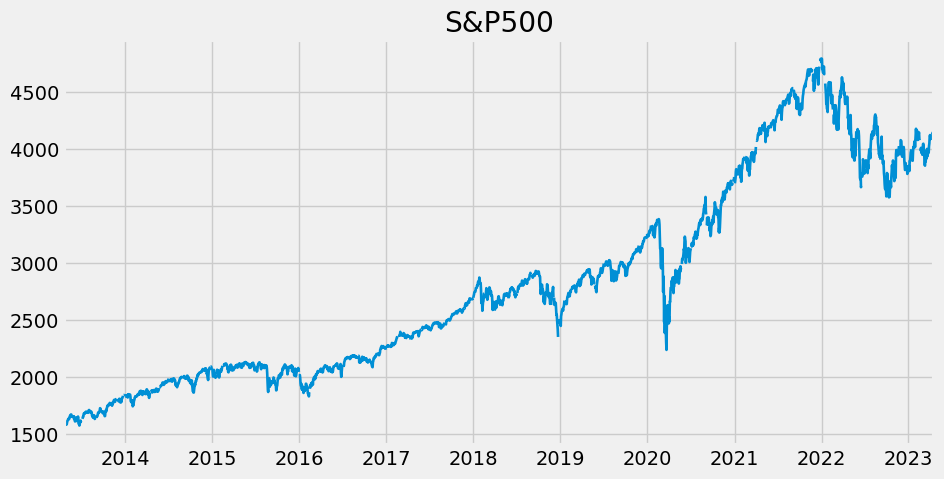

In [25]:
sp500.plot(figsize=(10,5),title="S&P500",lw=1.9);

## Pulling and joining multiple datasets
- Lets specifically look at unemployment and it's rate per state 

In [28]:
fred.search("unemployment",order_by="popularity").head()

id realtime_start realtime_end  \
series id                                                  
CPIAUCSL            CPIAUCSL     2023-04-21   2023-04-21   
UNRATE                UNRATE     2023-04-21   2023-04-21   
ICSA                    ICSA     2023-04-21   2023-04-21   
PAYEMS                PAYEMS     2023-04-21   2023-04-21   
CES0500000003  CES0500000003     2023-04-21   2023-04-21   

                                                           title  \
series id                                                          
CPIAUCSL       Consumer Price Index for All Urban Consumers: ...   
UNRATE                                         Unemployment Rate   
ICSA                                              Initial Claims   
PAYEMS                              All Employees, Total Nonfarm   
CES0500000003  Average Hourly Earnings of All Employees, Tota...   

              observation_start observation_end                frequency  \
series id                                                                  
CPIAUCSL             1947-01-01      2023-03-01                  Monthly   
UNRATE               1948-01-01      2023-03-01                  Monthly   
ICSA                 1967-01-07      2023-04-15  Weekly, Ending Saturday   
PAYEMS               1939-01-01      2023-03-01                  Monthly   
CES0500000003        2006-03-01      2023-03-01                  Monthly   

              frequency_short                 units          units_short  \
series id                                                                  
CPIAUCSL                    M   Index 1982-1984=100  Index 1982-1984=100   
UNRATE                      M               Percent                    %   
ICSA                        W                Number               Number   
PAYEMS                      M  Thousands of Persons    Thous. of Persons   
CES0500000003               M      Dollars per Hour           $ per Hour   

               seasonal_adjustment seasonal_adjustment_short  \
series id                                                      
CPIAUCSL       Seasonally Adjusted                        SA   
UNRATE         Seasonally Adjusted                        SA   
ICSA           Seasonally Adjusted                        SA   
PAYEMS         Seasonally Adjusted                        SA   
CES0500000003  Seasonally Adjusted                        SA   

                            last_updated popularity  \
series id                                             
CPIAUCSL       2023-04-12 11:11:01-05:00         95   
UNRATE         2023-04-07 07:44:02-05:00         94   
ICSA           2023-04-20 07:48:01-05:00         83   
PAYEMS         2023-04-07 07:45:02-05:00         82   
CES0500000003  2023-04-07 07:45:02-05:00         78   

                                                           notes  
series id                                                         
CPIAUCSL       The Consumer Price Index for All Urban Consume...  
UNRATE         The unemployment rate represents the number of...  
ICSA           An initial claim is a claim filed by an unempl...  
PAYEMS         All Employees: Total Nonfarm, commonly known a...  
CES0500000003  The series comes from the 'Current Employment ...

In [30]:
unrate = fred.get_series(series_id="UNRATE")

unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
Length: 903, dtype: float64

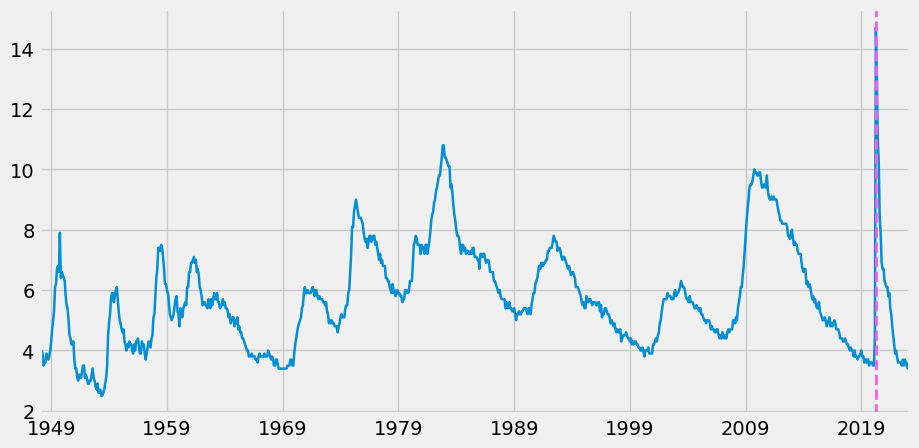

In [74]:
vis = unrate.plot(linewidth=1.8,figsize=([10,5]))
vis.axvline(x="2020-04-01",color="blue",linewidth=2,linestyle="--",c="#fc5dea");

#### Notice that unemployment skyrocketed right after the COVID-19 pandemic

In [142]:
unemp_df = fred.search("unemployment rate state",filter=("frequency","Monthly"))
unemp_df = unemp_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
unemp_df = unemp_df[unemp_df["title"].str.contains("Unemployment Rate")]
unemp_df = unemp_df[(unemp_df["id"].str.contains("UR")) & (~unemp_df["id"].str.contains("CS|CN|CM|CW"))] 
unemp_df = unemp_df[~unemp_df["title"].str.contains("Puerto Rico|District of Columbia")]

#### Now we will loop through every state in the unemp_df based on id then use the fred obj to get that specific id and get that series object. We will then take the object for that state and put it into a list called all states.

In [152]:
all_states = []

for myid in unemp_df["id"]:
    obj = fred.get_series(series_id=myid)
    obj = obj.to_frame(name=myid)
    all_states.append(obj)

pd.set_option("display.max_columns",None)
uemp_states = pd.concat(all_states,axis=1)

#### Now lets concat them all together using pd.concat so these will put all the dfs side by side if we mention axis = 1 which just means concat them side to side as new columns rather than rows (axis = 0)

In [153]:
uemp_states.head()

CAUR  TXUR  FLUR  NYUR  MIUR  OHUR  PAUR  NCUR  ALUR  MNUR  COUR  \
1976-01-01   9.2   5.8   9.7  10.3   9.9   8.1   8.0   6.4   6.6   6.0   5.8   
1976-02-01   9.2   5.8   9.7  10.3   9.9   8.1   8.1   6.4   6.6   6.0   5.7   
1976-03-01   9.1   5.9   9.6  10.2   9.9   8.1   8.1   6.4   6.6   5.9   5.7   
1976-04-01   9.1   5.9   9.5  10.2   9.8   8.0   8.1   6.3   6.5   5.8   5.6   
1976-05-01   9.0   5.9   9.3  10.1   9.6   7.8   8.1   6.1   6.4   5.7   5.6   

            ILUR  KYUR  MAUR  GAUR  VAUR  WIUR  NJUR  NMUR  WAUR  UTUR  MOUR  \
1976-01-01   6.6   5.6  10.5   8.4   6.1   5.8  10.3   8.6   8.5   5.8   5.9   
1976-02-01   6.6   5.6  10.5   8.4   6.1   5.8  10.3   8.7   8.5   5.9   5.9   
1976-03-01   6.6   5.6  10.5   8.4   6.1   5.7  10.3   8.7   8.4   5.8   5.9   
1976-04-01   6.6   5.6  10.3   8.3   6.0   5.6  10.3   8.6   8.5   5.8   6.0   
1976-05-01   6.6   5.5  10.1   8.1   5.9   5.5  10.3   8.6   8.5   5.7   6.0   

            ORUR  SCUR  TNUR  OKUR  NVUR  AZUR  INUR  IAUR  AKUR  NDUR  LAUR  \
1976-01-01   9.5   7.4   6.0   5.8   9.2  10.2   6.6   4.3   7.1   3.4   6.3   
1976-02-01   9.5   7.4   6.0   5.8   9.2  10.2   6.6   4.3   7.1   3.4   6.3   
1976-03-01   9.4   7.3   6.0   5.8   9.2  10.1   6.5   4.3   7.0   3.4   6.3   
1976-04-01   9.2   7.2   6.0   5.8   9.0  10.0   6.3   4.2   6.9   3.5   6.4   
1976-05-01   9.1   7.0   5.9   5.7   8.9   9.8   6.0   4.1   6.9   3.6   6.5   

            ARUR  WVUR  MDUR  KSUR  HIUR  SDUR  CTUR  MEUR  NEUR  WYUR  MSUR  \
1976-01-01   7.3   7.5   6.4   4.2   9.8   3.3   9.8   8.7   3.3   4.1   6.7   
1976-02-01   7.3   7.5   6.4   4.2   9.8   3.3   9.8   8.7   3.3   4.1   6.7   
1976-03-01   7.3   7.5   6.4   4.2   9.8   3.2   9.8   8.6   3.3   4.1   6.6   
1976-04-01   7.2   7.5   6.4   4.2   9.7   3.1   9.6   8.6   3.2   4.0   6.4   
1976-05-01   7.1   7.4   6.5   4.2   9.4   3.1   9.4   8.5   3.1   3.9   6.3   

            MTUR  IDUR  DEUR  NHUR  RIUR  VTUR  
1976-01-01   5.8   5.6   8.0   6.5   7.8   8.6  
1976-02-01   5.8   5.6   8.0   6.5   7.8   8.6  
1976-03-01   5.8   5.6   8.0   6.5   7.7   8.6  
1976-04-01   5.8   5.6   8.1   6.5   7.7   8.6  
1976-05-01   5.8   5.6   8.3   6.5   7.7   8.5

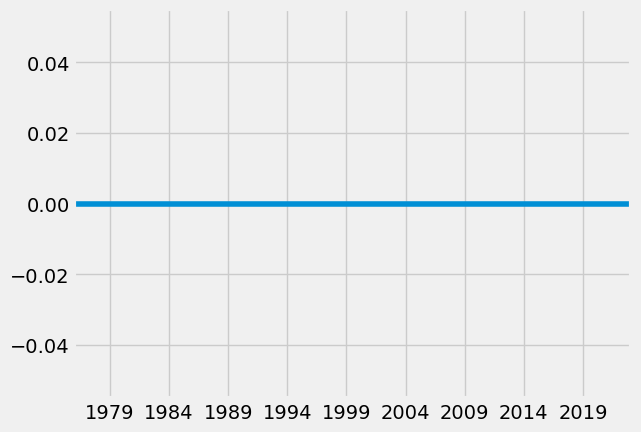

In [159]:
uemp_states.isna().sum(axis=1).plot();

#### Luckily we have no missing data because the sum of all the NA values over all the years is zero.

## Plotting the unemployment Data for each state
- instead of using matplotlib if we use plotly.express the graphs become interactive

In [169]:
px.line(uemp_states)

## Pulling April 2020 Unemployment rates
- the biggest peak on the graph is during April 2020 which is during the pandemic. Let's look closer at that

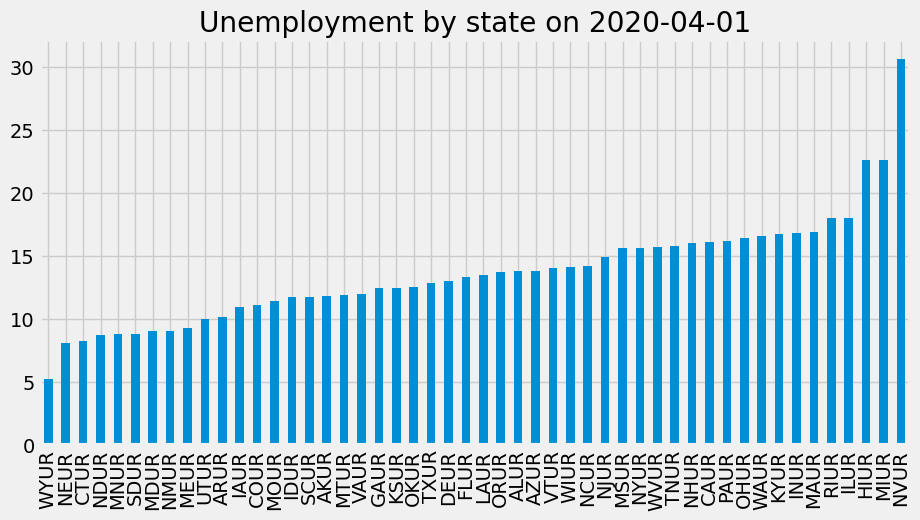

In [196]:
ax = uemp_states[uemp_states.index == "2020-04-01"].T \
.sort_values(by = "2020-04-01")\
.plot.bar(figsize=(10,5),title="Unemployment by state on 2020-04-01")

ax.legend().remove()

In [206]:
id_to_state = unemp_df["title"].str.replace("Unemployment Rate in","").to_dict()

In [235]:
uemp_states = uemp_states.drop("state",axis=1)

In [237]:
uemp_states.columns = [value.strip() for value in id_to_state.values()]
uemp_states.head()
# we changed the column names from the id to the actual state name

California  Texas  Florida  New York  Michigan  Ohio  \
1976-01-01         9.2    5.8      9.7      10.3       9.9   8.1   
1976-02-01         9.2    5.8      9.7      10.3       9.9   8.1   
1976-03-01         9.1    5.9      9.6      10.2       9.9   8.1   
1976-04-01         9.1    5.9      9.5      10.2       9.8   8.0   
1976-05-01         9.0    5.9      9.3      10.1       9.6   7.8   

            Pennsylvania  North Carolina  Alabama  Minnesota  Colorado  \
1976-01-01           8.0             6.4      6.6        6.0       5.8   
1976-02-01           8.1             6.4      6.6        6.0       5.7   
1976-03-01           8.1             6.4      6.6        5.9       5.7   
1976-04-01           8.1             6.3      6.5        5.8       5.6   
1976-05-01           8.1             6.1      6.4        5.7       5.6   

            Illinois  Kentucky  Massachusetts  Georgia  Virginia  Wisconsin  \
1976-01-01       6.6       5.6           10.5      8.4       6.1        5.8   
1976-02-01       6.6       5.6           10.5      8.4       6.1        5.8   
1976-03-01       6.6       5.6           10.5      8.4       6.1        5.7   
1976-04-01       6.6       5.6           10.3      8.3       6.0        5.6   
1976-05-01       6.6       5.5           10.1      8.1       5.9        5.5   

            New Jersey  New Mexico  Washington  Utah  Missouri  Oregon  \
1976-01-01        10.3         8.6         8.5   5.8       5.9     9.5   
1976-02-01        10.3         8.7         8.5   5.9       5.9     9.5   
1976-03-01        10.3         8.7         8.4   5.8       5.9     9.4   
1976-04-01        10.3         8.6         8.5   5.8       6.0     9.2   
1976-05-01        10.3         8.6         8.5   5.7       6.0     9.1   

            South Carolina  Tennessee  Oklahoma  Nevada  Arizona  Indiana  \
1976-01-01             7.4        6.0       5.8     9.2     10.2      6.6   
1976-02-01             7.4        6.0       5.8     9.2     10.2      6.6   
1976-03-01             7.3        6.0       5.8     9.2     10.1      6.5   
1976-04-01             7.2        6.0       5.8     9.0     10.0      6.3   
1976-05-01             7.0        5.9       5.7     8.9      9.8      6.0   

            Iowa  Alaska  North Dakota  Louisiana  Arkansas  West Virginia  \
1976-01-01   4.3     7.1           3.4        6.3       7.3            7.5   
1976-02-01   4.3     7.1           3.4        6.3       7.3            7.5   
1976-03-01   4.3     7.0           3.4        6.3       7.3            7.5   
1976-04-01   4.2     6.9           3.5        6.4       7.2            7.5   
1976-05-01   4.1     6.9           3.6        6.5       7.1            7.4   

            Maryland  Kansas  Hawaii  South Dakota  Connecticut  Maine  \
1976-01-01       6.4     4.2     9.8           3.3          9.8    8.7   
1976-02-01       6.4     4.2     9.8           3.3          9.8    8.7   
1976-03-01       6.4     4.2     9.8           3.2          9.8    8.6   
1976-04-01       6.4     4.2     9.7           3.1          9.6    8.6   
1976-05-01       6.5     4.2     9.4           3.1          9.4    8.5   

            Nebraska  Wyoming  Mississippi  Montana  Idaho  Delaware  \
1976-01-01       3.3      4.1          6.7      5.8    5.6       8.0   
1976-02-01       3.3      4.1          6.7      5.8    5.6       8.0   
1976-03-01       3.3      4.1          6.6      5.8    5.6       8.0   
1976-04-01       3.2      4.0          6.4      5.8    5.6       8.1   
1976-05-01       3.1      3.9          6.3      5.8    5.6       8.3   

            New Hampshire  Rhode Island  Vermont  
1976-01-01            6.5           7.8      8.6  
1976-02-01            6.5           7.8      8.6  
1976-03-01            6.5           7.7      8.6  
1976-04-01            6.5           7.7      8.6  
1976-05-01            6.5           7.7      8.5

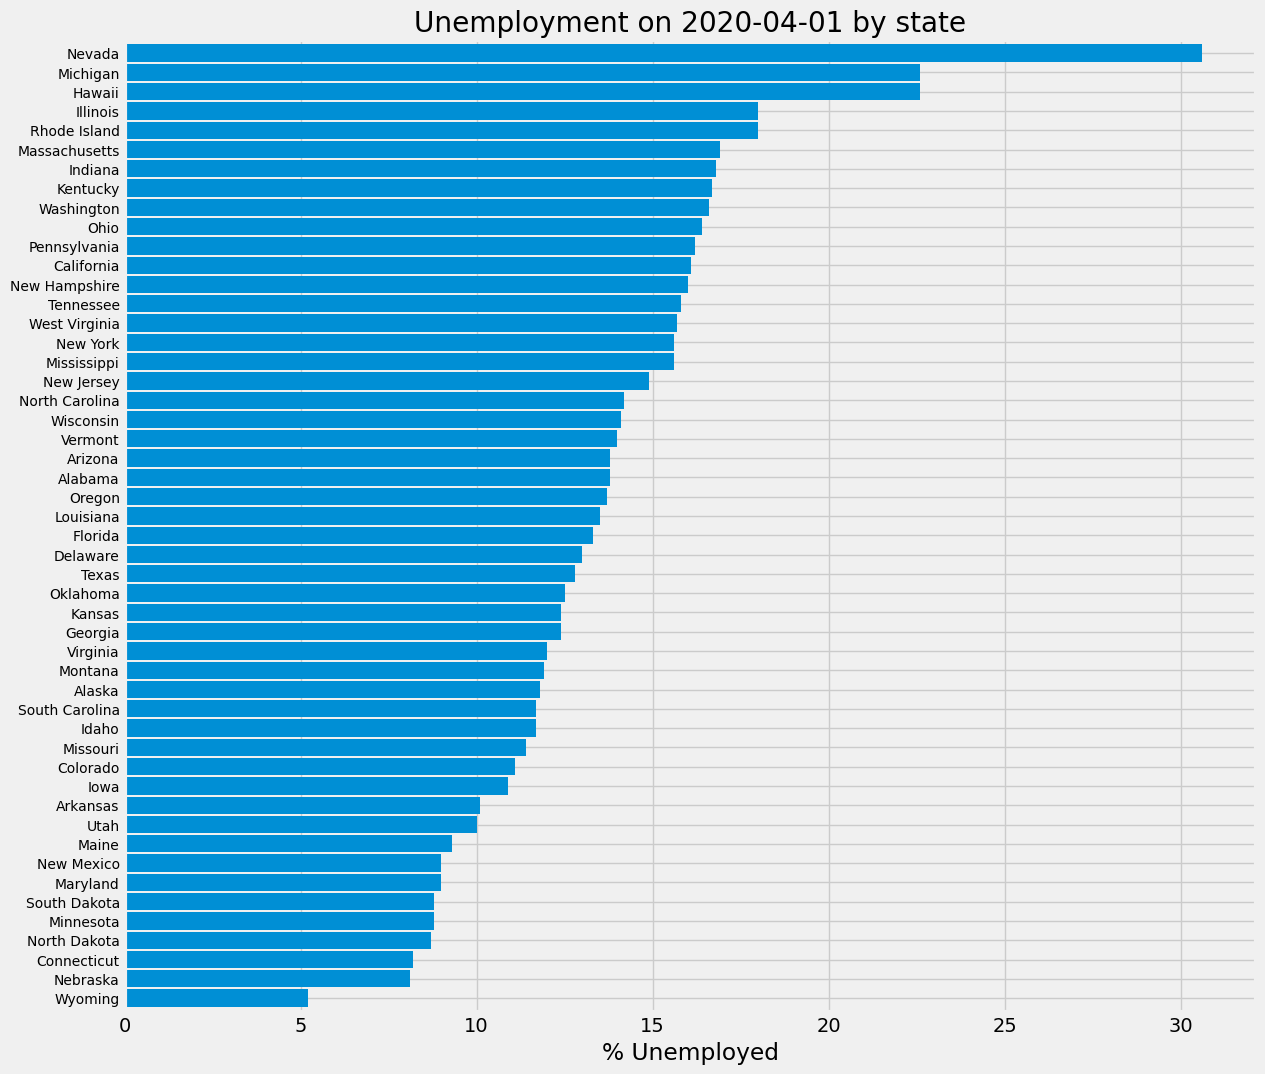

In [276]:
ax = uemp_states[uemp_states.index == "2020-04-01"].T\
.sort_values(by="2020-04-01")\
.plot.barh(figsize=(13,12),title="Unemployment on 2020-04-01 by state",width=0.9)

ax.legend().remove()

ax.set_xlabel("% Unemployed")

ax.tick_params(axis="y",labelsize=10)

## Looking at Participation Rate
- Often the best rate to look at along with the unemployment rate is the participation rate

In [314]:
part_df = fred.search("participation rate state",filter=("frequency","Monthly"))
part_df = part_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
part_df = part_df[(part_df["id"].str.contains("LB")) & (~part_df["title"].str.contains("District Of"))]

In [342]:
all_states = []

for myid in part_df.index:
    obj = fred.get_series(series_id=myid)
    obj = obj.to_frame(name=myid)
    all_states.append(obj)

In [350]:
part_states = pd.concat(all_states,axis=1)
id_to_state = part_df["title"].str.replace("Labor Force Participation Rate for ","").to_dict()
part_states.columns = list(id_to_state.values())

part_states.head()

California  Florida  Wisconsin  Alabama  Minnesota  New York  \
1976-01-01        62.6     55.8       65.6     57.0       65.6      58.0   
1976-02-01        62.4     55.7       65.5     56.9       65.5      58.0   
1976-03-01        62.2     55.5       65.4     56.8       65.4      58.0   
1976-04-01        62.2     55.5       65.4     56.8       65.4      58.0   
1976-05-01        62.3     55.4       65.5     56.8       65.5      58.1   

            Texas  Michigan  Kentucky  Ohio  Colorado  Tennessee  Utah  Iowa  \
1976-01-01   63.8      61.6      60.5  61.7      67.2       59.6  62.8  64.4   
1976-02-01   63.5      61.5      60.3  61.7      67.0       59.4  62.6  64.3   
1976-03-01   63.4      61.5      60.2  61.7      66.8       59.3  62.5  64.2   
1976-04-01   63.5      61.6      60.1  61.6      66.6       59.3  62.5  64.1   
1976-05-01   63.6      61.7      60.1  61.6      66.5       59.4  62.6  64.1   

            North Carolina  Georgia  Maine  Pennsylvania  Louisiana  \
1976-01-01            66.5     63.7   62.1          58.4       56.8   
1976-02-01            66.3     63.6   61.9          58.3       56.6   
1976-03-01            66.2     63.5   61.9          58.3       56.5   
1976-04-01            66.2     63.5   61.8          58.3       56.4   
1976-05-01            66.3     63.6   61.7          58.3       56.4   

            West Virginia  New Mexico  Virginia  Illinois  Indiana  \
1976-01-01           52.5        60.8      65.9      63.0     64.0   
1976-02-01           52.4        60.5      65.8      63.0     63.9   
1976-03-01           52.3        60.3      65.6      62.9     63.8   
1976-04-01           52.3        60.3      65.5      62.9     63.8   
1976-05-01           52.2        60.3      65.4      63.0     63.9   

            Massachusetts  Oklahoma  Mississippi  Arizona  New Jersey  \
1976-01-01           64.8      59.3         58.8     59.5        61.5   
1976-02-01           64.7      59.2         58.6     59.2        61.4   
1976-03-01           64.6      59.1         58.5     59.1        61.4   
1976-04-01           64.6      59.0         58.5     59.1        61.5   
1976-05-01           64.6      59.0         58.5     59.1        61.6   

            South Carolina  Oregon  Alaska  Nebraska  Missouri  Maryland  \
1976-01-01            65.3    62.9    69.0      64.9      60.5      64.3   
1976-02-01            65.2    62.7    68.4      64.9      60.3      64.2   
1976-03-01            65.0    62.5    67.8      64.8      60.3      64.1   
1976-04-01            64.9    62.4    67.9      64.8      60.4      64.1   
1976-05-01            64.7    62.5    67.9      64.8      60.6      64.1   

            Arkansas  Hawaii  Washington  Montana  Connecticut  Vermont  \
1976-01-01      57.9    69.9        60.9     62.7         64.2     63.6   
1976-02-01      57.8    69.6        60.7     62.5         64.1     63.4   
1976-03-01      57.7    69.6        60.6     62.4         64.0     63.2   
1976-04-01      57.7    69.4        60.6     62.3         64.1     63.5   
1976-05-01      57.7    69.3        60.7     62.2         64.3     63.6   

            Idaho  Kansas  New Hampshire  North Dakota  South Dakota  Nevada  \
1976-01-01   63.0    65.1           65.9          62.6          64.6    71.3   
1976-02-01   62.8    65.0           65.6          62.4          64.4    70.8   
1976-03-01   62.7    64.9           65.6          62.3          64.4    70.5   
1976-04-01   62.7    65.0           65.7          62.5          64.3    70.4   
1976-05-01   62.8    65.1           66.0          62.6          64.3    70.5   

            Wyoming  Delaware  Rhode Island  
1976-01-01     65.3      62.7          63.8  
1976-02-01     64.9      62.5          63.7  
1976-03-01     64.7      62.5          63.6  
1976-04-01     64.9      62.4          63.7  
1976-05-01     65.2      62.4          63.6

<AxesSubplot:>

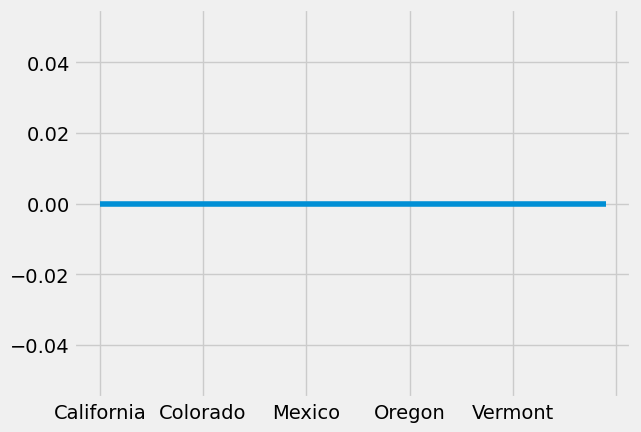

In [328]:
part_states.isna().sum().plot()

#### Luckily we don't have any missing data

## Plotting Unemployment vs Participation

<AxesSubplot:>

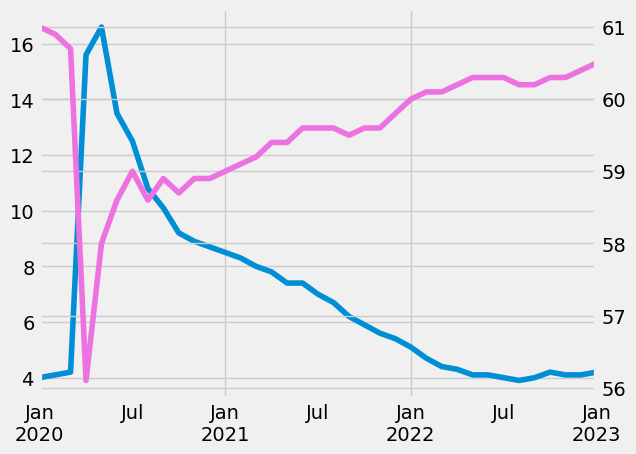

In [357]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

uemp_states.query("index >= '2020' and index <= '2023'")["New York"] \
.plot(ax=ax,label="Unemployment") 

part_states.query("index >= '2020' and index <= '2023'")["New York"] \
.plot(ax=ax2,label="Participation",color="#ed72e1")

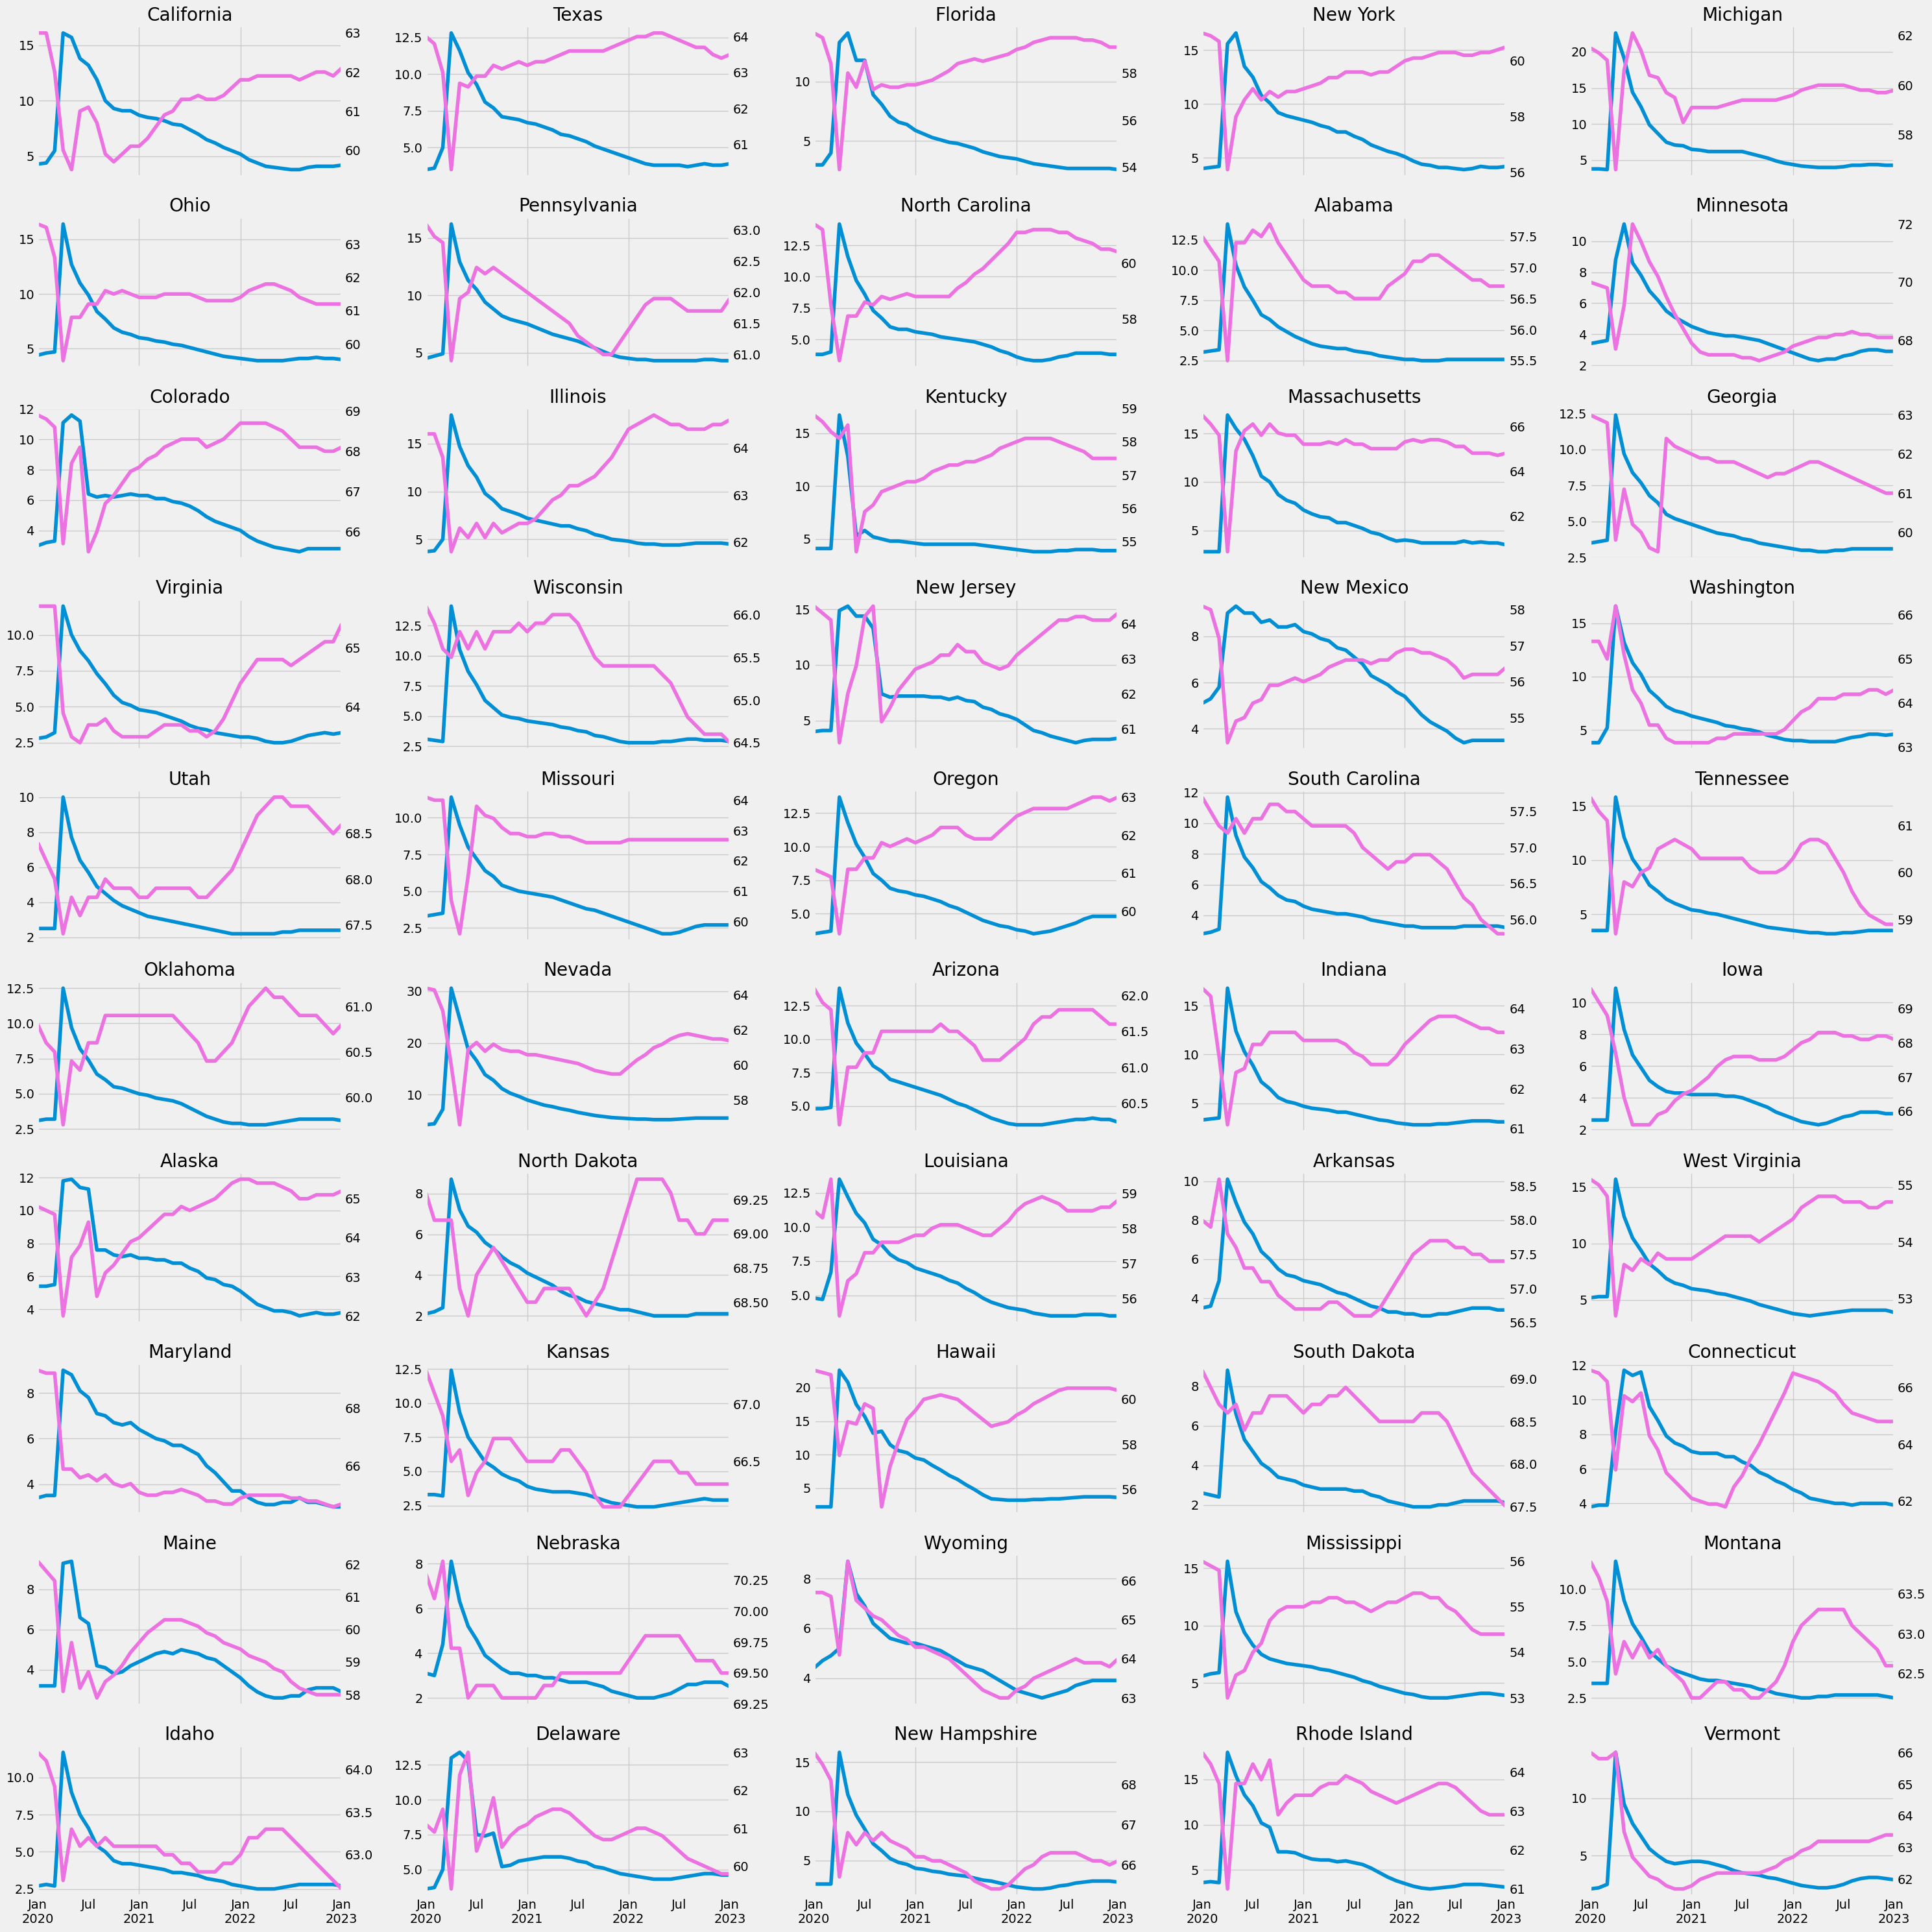

In [373]:
fig,axs = plt.subplots(10,5 ,figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    ax2 = axs[i].twinx()
    
    uemp_states.query("index >= '2020' and index <= '2023'")[state] \
    .plot(ax=axs[i],label="Unemployment")
    
    part_states.query("index >= '2020' and index <= '2023'")[state] \
    .plot(ax=ax2,label="Participation",color="#ed72e1")
    
    axs[i].set_title(state)
    
    ax2.grid(False)
    
    i += 1
    
plt.tight_layout()
plt.show()